In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


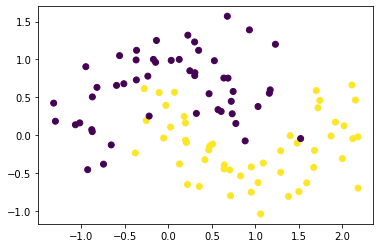

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Set parameters to 0
model.get_weights()

[array([[ 0.08053708, -0.6629338 , -0.5224731 , -0.45766383,  0.5552792 ,
          0.62752706,  0.5443991 ,  0.07004404, -0.19326353, -0.49264473],
        [ 0.40016347, -0.34869823,  0.52611846, -0.22826228,  0.20426065,
         -0.53891826,  0.14095926, -0.54274637, -0.28209898,  0.2506699 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.4233387 ],
        [ 0.54871315],
        [-0.6005732 ],
        [-0.30894816],
        [ 0.39229983],
        [-0.22970462],
        [ 0.49325913],
        [ 0.19212693],
        [-0.16439396],
        [-0.05733448]], dtype=float32),
 array([0.], dtype=float32)]

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 147ms/step - loss: 0.6933 - accuracy: 0.4500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 10ms/step - loss: 0.6933 - accuracy: 0.4500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [====

In [15]:
model.get_weights()

[array([[ 0.45488945,  0.45488945,  0.45488945,  0.45488945,  0.45488945,
          0.45488945,  0.45488945,  0.45488945,  0.45488945,  0.45488945],
        [-0.48927078, -0.48927078, -0.48927078, -0.48927078, -0.48927078,
         -0.48927078, -0.48927078, -0.48927078, -0.48927078, -0.48927078]],
       dtype=float32),
 array([-0.14947627, -0.14947627, -0.14947627, -0.14947627, -0.14947627,
        -0.14947627, -0.14947627, -0.14947627, -0.14947627, -0.14947627],
       dtype=float32),
 array([[0.06120804],
        [0.06120804],
        [0.06120804],
        [0.06120804],
        [0.06120804],
        [0.06120804],
        [0.06120804],
        [0.06120804],
        [0.06120804],
        [0.06120804]], dtype=float32),
 array([-0.06857019], dtype=float32)]

3888/3888 [==============================] - 6s 1ms/step


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


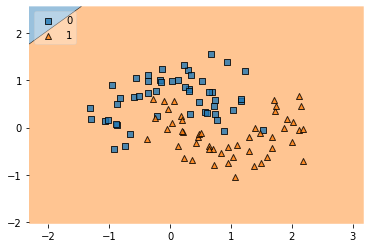

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)